In [77]:
# Python packages
import os
import seaborn as sns
import anndata as ad
import glob
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# CellRanger

In [78]:
# Load in the CellRanger QC metrics
cellranger_qcs = pd.read_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/23Oct23/cellranger/MM168/outs/singlecell.csv", index_col=0)
cellranger_qcs.index = cellranger_qcs.index.str.replace("-1", "")
cellranger_qcs.index = "MM168_" + cellranger_qcs.index
len(cellranger_qcs)

415118

In [79]:
# How many reads passed filters?
(cellranger_qcs["passed_filters"] > 500).sum()

9619

# GL pipeline

In [80]:
# Read csv
gl_qcs = pd.read_csv("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/processed/27Oct23/10xPipeline/MM168/MM168.qc_metrics.txt", sep="\t", index_col=0)
len(gl_qcs)

124461

In [81]:
# How many reads passed filters?
(gl_qcs["unique_usable_reads"] > 500).sum()

3595

In [82]:
# What percentage of barcodes overlap between the two pipelines?
len(set(gl_qcs.index) & set(cellranger_qcs.index)) / len(set(gl_qcs.index))

1.0

In [146]:
gl_cellranger_shared_qcs = pd.merge(gl_qcs, cellranger_qcs, left_index=True, right_index=True, suffixes=("_gl", "_cellranger"))

In [147]:
gl_cellranger_shared_qcs.columns

Index(['unique_usable_reads', 'total_sequenced_reads', 'duplicated_reads',
       'unique_mito_reads', 'reads_in_peaks', 'reads_in_promoters', 'tss_used',
       'frac_reads_in_peaks', 'frac_reads_in_promoters', 'frac_promoters_used',
       'frac_mito_reads', 'frac_duplicated_reads', 'total', 'duplicate',
       'chimeric', 'unmapped', 'lowmapq', 'mitochondrial', 'nonprimary',
       'passed_filters', 'is__cell_barcode', 'excluded_reason',
       'TSS_fragments', 'DNase_sensitive_region_fragments',
       'enhancer_region_fragments', 'promoter_region_fragments',
       'on_target_fragments', 'blacklist_region_fragments',
       'peak_region_fragments', 'peak_region_cutsites'],
      dtype='object')

Text(0, 0.5, 'TSS_fragments_cellranger')

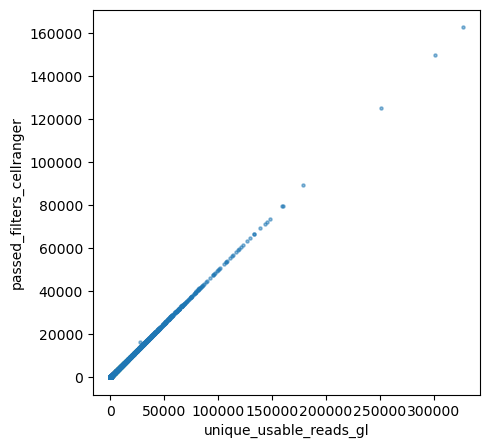

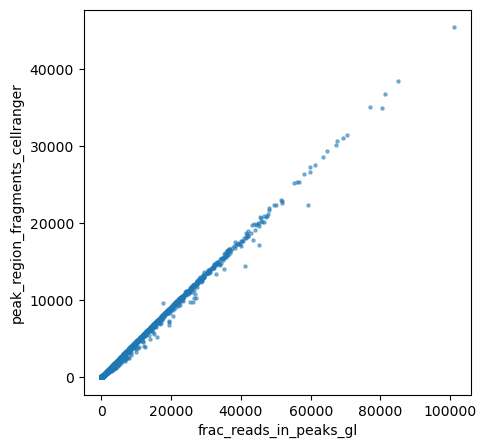

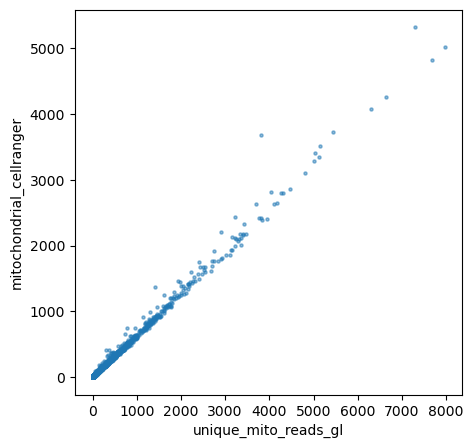

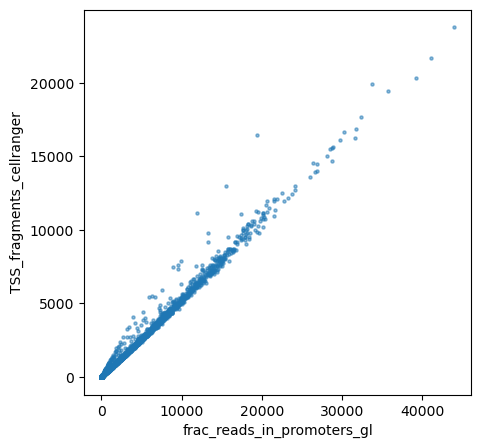

In [156]:
# Scatterplot of unique_usable_reads vs passed_filters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(gl_cellranger_shared_qcs["unique_usable_reads"], gl_cellranger_shared_qcs["passed_filters"], s=5, alpha=0.5)
ax.set_xlabel("unique_usable_reads_gl")
ax.set_ylabel("passed_filters_cellranger")

# Scatterplot of unique_usable_reads vs passed_filters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(gl_cellranger_shared_qcs["reads_in_peaks"], gl_cellranger_shared_qcs["peak_region_fragments"], s=5, alpha=0.5)
ax.set_xlabel("frac_reads_in_peaks_gl")
ax.set_ylabel("peak_region_fragments_cellranger")

# Scatterplot of unique_usable_reads vs passed_filters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(gl_cellranger_shared_qcs["unique_mito_reads"], gl_cellranger_shared_qcs["mitochondrial"], s=5, alpha=0.5)
ax.set_xlabel("unique_mito_reads_gl")
ax.set_ylabel("mitochondrial_cellranger")

# Scatterplot of unique_usable_reads vs passed_filters
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(gl_cellranger_shared_qcs["reads_in_promoters"], gl_cellranger_shared_qcs["TSS_fragments"], s=5, alpha=0.5)
ax.set_xlabel("frac_reads_in_promoters_gl")
ax.set_ylabel("TSS_fragments_cellranger")

# SnapATAC

In [89]:
# Load the SnapATAC object
snap_ad = sc.read_h5ad("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/27Oct23/snapatac2/cellcommander_recipe/MM168/clustered.h5ad")
snap_qcs = snap_ad.obs
snap_qcs.index = snap_qcs.index.str.replace("-1", "")
snap_qcs.index = "MM168_" + snap_qcs.index
len(snap_qcs)

6847

In [90]:
# What percentage of barcodes overlap between this one and the CellRanger pipeline?
len(set(snap_qcs.index) & set(cellranger_qcs.index)) / len(set(snap_qcs.index))

1.0

In [91]:
# What percentage of barcodes overlap between this one and the 10x pipeline?
len(set(snap_qcs.index) & set(gl_qcs.index)) / len(set(snap_qcs.index))

0.3147363808967431

# Muon QC

In [107]:
muon_ad = sc.read_h5ad("/cellar/users/aklie/data/datasets/Zhu2023_sc-islet_snATAC-seq/annotation/26Oct23/cellcommander/MM168/detect_doublets/amulet_only.h5ad")
muon_qcs = muon_ad.obs
muon_qcs.index = muon_qcs.index.str.replace("-1", "")
muon_qcs.index = "MM168_" + muon_qcs.index
len(muon_qcs)

2085

In [108]:
# What percentage of barcodes overlap between this one and the CellRanger pipeline?
len(set(muon_qcs.index) & set(cellranger_qcs.index)) / len(set(muon_qcs.index))

1.0

In [109]:
# What percentage of barcodes overlap between this one and the 10x pipeline?
len(set(muon_qcs.index) & set(gl_qcs.index)) / len(set(muon_qcs.index))

0.3237410071942446

In [110]:
# What percentage of barcodes overlap between this one and the SnapATAC pipeline?
len(set(muon_qcs.index) & set(snap_qcs.index)) / len(set(muon_qcs.index))

0.9323741007194245

In [129]:
# Which barcodes are unique to each pipeline?
gl_barcodes = set(gl_qcs.index)
snap_barcodes = set(snap_qcs.index)
muon_barcodes = set(muon_qcs.index)
gl_unique = list(gl_barcodes - snap_barcodes - muon_barcodes)
snap_unique = list(snap_barcodes - gl_barcodes - muon_barcodes)
muon_unique = list(muon_barcodes - gl_barcodes - snap_barcodes)
snap_gl_shared = list(gl_barcodes & snap_barcodes - muon_barcodes)
muon_gl_shared = list(gl_barcodes & muon_barcodes - snap_barcodes)
snap_muon_shared = list(snap_barcodes & muon_barcodes - gl_barcodes)
all_shared = list(gl_barcodes & snap_barcodes & muon_barcodes)

In [130]:
snap_gl_shared_qcs = pd.merge(gl_qcs.loc[snap_gl_shared], snap_qcs.loc[snap_gl_shared], left_index=True, right_index=True, suffixes=("_gl", "_snap"))

In [131]:
muon_gl_shared_qcs = pd.merge(gl_qcs.loc[muon_gl_shared], muon_qcs.loc[muon_gl_shared], left_index=True, right_index=True, suffixes=("_gl", "_muon"))

In [132]:
snap_muon_shared_qcs = pd.merge(muon_qcs.loc[snap_muon_shared], snap_qcs.loc[snap_muon_shared], left_index=True, right_index=True, suffixes=("_muon", "_snap"))

In [133]:
all_shared_qcs = pd.merge(gl_qcs.loc[all_shared], snap_qcs.loc[all_shared], left_index=True, right_index=True, suffixes=("_gl", "_snap")).merge(muon_qcs.loc[all_shared], left_index=True, right_index=True, suffixes=("", "_muon"))

In [134]:
len(snap_gl_shared_qcs), len(muon_gl_shared_qcs), len(snap_muon_shared_qcs), len(all_shared_qcs)

(1530, 50, 1319, 625)

# SnapATAC and Gaulton Lab

In [138]:
snap_gl_shared_qcs.columns

Index(['unique_usable_reads', 'total_sequenced_reads', 'duplicated_reads',
       'unique_mito_reads', 'reads_in_peaks', 'reads_in_promoters', 'tss_used',
       'frac_reads_in_peaks', 'frac_reads_in_promoters', 'frac_promoters_used',
       'frac_mito_reads', 'frac_duplicated_reads', 'tsse', 'n_fragment',
       'frac_dup', 'frac_mito', 'doublet_probability', 'doublet_score',
       'leiden_1'],
      dtype='object')

Text(0, 0.5, 'tsse_snap')

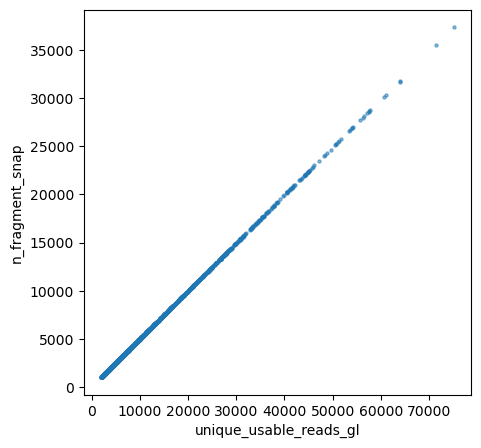

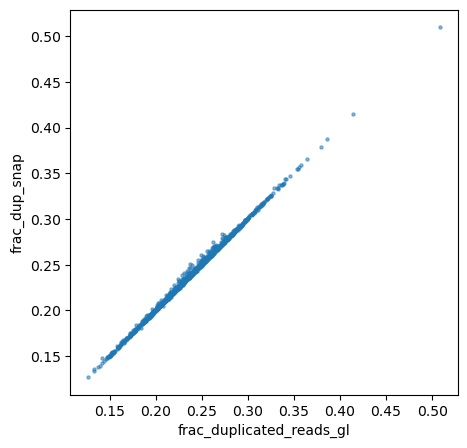

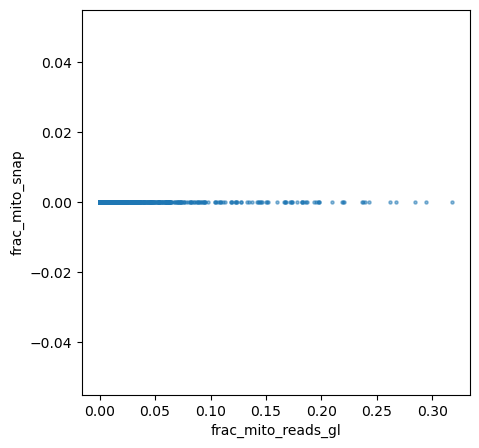

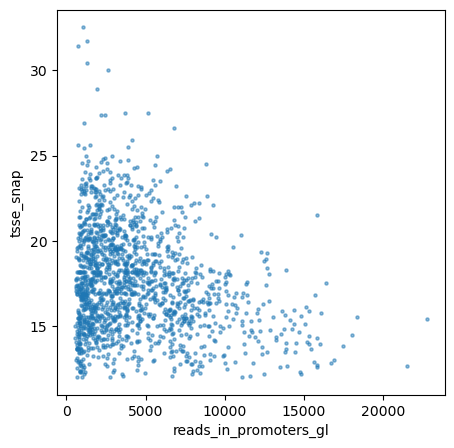

In [145]:
# Scatterplot of unique_usable_reads vs n_fragment
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(snap_gl_shared_qcs["unique_usable_reads"], snap_gl_shared_qcs["n_fragment"], s=5, alpha=0.5)
ax.set_xlabel("unique_usable_reads_gl")
ax.set_ylabel("n_fragment_snap")

# Scatterplot of frac_duplicated_reads vs frac_dup
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(snap_gl_shared_qcs["frac_duplicated_reads"], snap_gl_shared_qcs["frac_dup"], s=5, alpha=0.5)
ax.set_xlabel("frac_duplicated_reads_gl")
ax.set_ylabel("frac_dup_snap")

# Scatterplot of frac_mito_reads vs frac_mito
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(snap_gl_shared_qcs["frac_mito_reads"], snap_gl_shared_qcs["frac_mito"], s=5, alpha=0.5)
ax.set_xlabel("frac_mito_reads_gl")
ax.set_ylabel("frac_mito_snap")

# Scatterplot of reads_in_promoters vs tsse
fig, ax = plt.subplots(figsize=(5,5))
ax.scatter(snap_gl_shared_qcs["reads_in_promoters"], snap_gl_shared_qcs["tsse"], s=5, alpha=0.5)
ax.set_xlabel("reads_in_promoters_gl")
ax.set_ylabel("tsse_snap")

In [ ]:
# 